# SOURCE CODE
###Husna Nur Amalina

##Load the Data

In the Emotic Dataset introduced by Kosti et al. (2019), the dataset contains 23, 571 images and 34, 320 annotated people. Some of the images were manually collected from the Internet by Google search engine and the rest of images belong to 2 public benchmark datasets: COCO and Ade20k. As mentioned in its paper, the annotation of the dataset is done by with Amazon Mechanical Turk services. The dataset has been splitted in o three sets: Training (70%), Validation (10%), and Testing (20%)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd

# Load and preprocess the training, validation and test dataset
train_data = pd.read_csv('/content/drive/MyDrive/Emotic_Dataset/emotic_pre/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Emotic_Dataset/emotic_pre/test.csv')
val_data = pd.read_csv('/content/drive/MyDrive/Emotic_Dataset/emotic_pre/val.csv')

# Combine the dataset
data = pd.concat([train_data, val_data, test_data], ignore_index=True)

data.head()

,Index,Folder,Filename,Image Size,BBox,Categorical_Labels,Continuous_Labels,Gender,Age
0,0,mscoco/images,COCO_val2014_000000562243.jpg,"[640, 640]","[86, 58, 564, 628]","['Disconnection', 'Doubt/Confusion']","[5, 3, 9]",Male,Adult
1,1,mscoco/images,COCO_train2014_000000288841.jpg,"[640, 480]","[485, 149, 605, 473]",['Anticipation'],"[6, 4, 7]",Male,Adult
2,2,mscoco/images,COCO_val2014_000000558171.jpg,"[640, 480]","[305, 92, 461, 465]","['Engagement', 'Excitement', 'Happiness']","[7, 8, 8]",Male,Teenager
3,3,mscoco/images,COCO_train2014_000000369575.jpg,"[480, 640]","[221, 63, 448, 372]","['Aversion', 'Pleasure']","[8, 9, 8]",Male,Kid
4,4,mscoco/images,COCO_train2014_000000213009.jpg,"[500, 333]","[44, 143, 150, 288]","['Confidence', 'Excitement']","[7, 9, 10]",Male,Adult


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33784 entries, 0 to 33783
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Index               33784 non-null  int64 
 1   Folder              33784 non-null  object
 2   Filename            33784 non-null  object
 3   Image Size          33784 non-null  object
 4   BBox                33784 non-null  object
 5   Categorical_Labels  33784 non-null  object
 6   Continuous_Labels   33784 non-null  object
 7   Gender              33784 non-null  object
 8   Age                 33784 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.3+ MB


In [ ]:
data.tail()

,Index,Folder,Filename,Image Size,BBox,Categorical_Labels,Continuous_Labels,Gender,Age
33779,7198,mscoco/images,COCO_train2014_000000456216.jpg,"[640, 427]","[357, 56, 499, 421]","['Affection', 'Confidence', 'Engagement', 'Sym...","[5, 8, 6]",Male,Adult
33780,7199,mscoco/images,COCO_train2014_000000427981.jpg,"[640, 425]","[389, 92, 496, 420]","['Anticipation', 'Confidence', 'Engagement', '...","[6, 5, 7]",Female,Adult
33781,7200,mscoco/images,COCO_train2014_000000105452.jpg,"[640, 480]","[290, 66, 397, 368]","['Anticipation', 'Engagement', 'Happiness', 'P...","[6, 5, 8]",Male,Adult
33782,7201,framesdb/images,frame_2nli2b3sozxtq9vy.jpg,"[3648, 2736]","[1122, 879, 1797, 2735]","['Confidence', 'Engagement']","[6, 6, 7]",Female,Adult
33783,7202,mscoco/images,COCO_val2014_000000127530.jpg,"[640, 440]","[254, 15, 541, 439]","['Anticipation', 'Confidence', 'Engagement', '...","[6, 7, 7]",Male,Adult


## Generate Random Image from the Dataset

(640, 426)
/content/drive/MyDrive/Emotic_Dataset/emotic/mscoco/images/COCO_train2014_000000309096.jpg


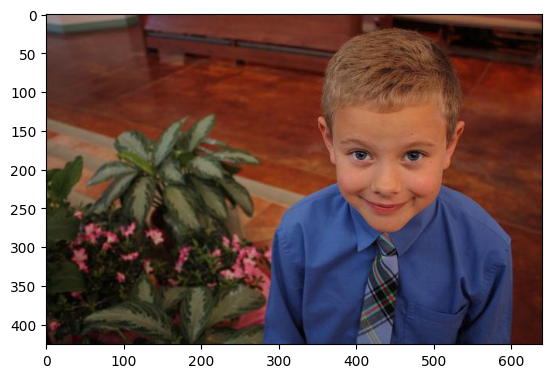

In [ ]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt


# Root folder containing the dataset structure
root_folder = '/content/drive/MyDrive/Emotic_Dataset/emotic/'

# List of subdirectories representing different datasets
dataset_dirs = ['ade20k', 'emodb_small', 'framesdb', 'mscoco']

# Select a random dataset directory
random_dataset = random.choice(dataset_dirs) + '/images'
random_dataset_dir = root_folder + random_dataset
file_list = os.listdir(random_dataset_dir)
random_file = random.choice(file_list)

# Path to the random image
image_path = os.path.join(random_dataset_dir, random_file)

if os.path.exists(image_path):
    image = Image.open(image_path)
    print(image.size)
    print(image_path)
    plt.imshow(image)

else:
    print("Image file not found:", image_path)

Display Bounding Box and Respective Labels

Folder: mscoco/images
Filename: COCO_train2014_000000309096.jpg
BBox: [279, 19, 602, 418]
Labels:  ['Anticipation', 'Confidence', 'Engagement', 'Excitement', 'Happiness', 'Peace', 'Pleasure', 'Sympathy']



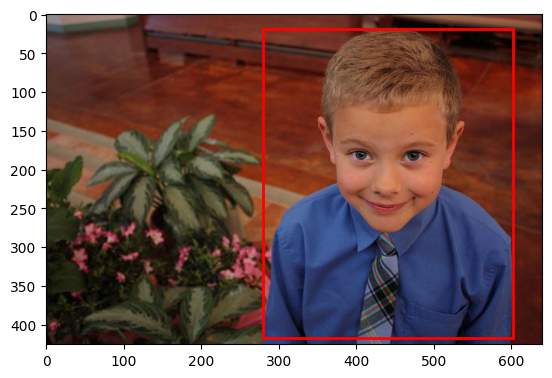

In [ ]:
from PIL import Image
import matplotlib.patches as patches

for index, row in data.iterrows():
    if row['Folder'] == random_dataset and row['Filename'] == random_file:
        selected_folder = row['Folder']
        selected_filename = row['Filename']
        selected_bbox = row['BBox']
        selected_labels = row['Categorical_Labels']
        print("Folder:", selected_folder)
        print("Filename:", selected_filename)
        print("BBox:", selected_bbox)
        print("Labels: ", selected_labels + "\n")

        # Convert bbox to lists (if they are stored as strings)
        bbox = eval(selected_bbox) if isinstance(selected_bbox, str) else selected_bbox

        image_path = os.path.join(selected_folder, selected_filename)
        if os.path.exists(image_path):
            image = Image.open(image_path)
            print(image_path)
            print(image.size)

        # Create a figure and axes
        fig, ax = plt.subplots()

        # Display the image
        ax.imshow(image)

        x_min, y_min, x_max, y_max = bbox

        # Create a rectangle patch
        rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=2, edgecolor='r', facecolor='none')

        # Add the rectangle patch (bounding box) to the plot
        ax.add_patch(rect)

        # Show the plot
        plt.show()

## Data Splitting

Since the objective of this project to create an emotion recognition on children, the dataset that will be used in this project would be a filtered data that include the images of kid and teenagers.

In [2]:
kid_and_teenager_labels = ['Kid', 'Teenager']

child_dataset = data[data['Age'].isin(kid_and_teenager_labels)]
child_dataset.head()

,Index,Folder,Filename,Image Size,BBox,Categorical_Labels,Continuous_Labels,Gender,Age
2,2,mscoco/images,COCO_val2014_000000558171.jpg,"[640, 480]","[305, 92, 461, 465]","['Engagement', 'Excitement', 'Happiness']","[7, 8, 8]",Male,Teenager
3,3,mscoco/images,COCO_train2014_000000369575.jpg,"[480, 640]","[221, 63, 448, 372]","['Aversion', 'Pleasure']","[8, 9, 8]",Male,Kid
7,7,mscoco/images,COCO_train2014_000000186198.jpg,"[640, 429]","[336, 80, 494, 327]","['Anticipation', 'Peace']","[7, 7, 8]",Male,Kid
8,8,mscoco/images,COCO_train2014_000000006590.jpg,"[640, 480]","[188, 109, 381, 382]",['Engagement'],"[7, 4, 7]",Female,Kid
9,9,mscoco/images,COCO_train2014_000000144608.jpg,"[350, 500]","[198, 29, 300, 232]","['Fatigue', 'Happiness']","[7, 7, 6]",Male,Teenager


In [3]:
child_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6265 entries, 2 to 33770
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Index               6265 non-null   int64 
 1   Folder              6265 non-null   object
 2   Filename            6265 non-null   object
 3   Image Size          6265 non-null   object
 4   BBox                6265 non-null   object
 5   Categorical_Labels  6265 non-null   object
 6   Continuous_Labels   6265 non-null   object
 7   Gender              6265 non-null   object
 8   Age                 6265 non-null   object
dtypes: int64(1), object(8)
memory usage: 489.5+ KB


In [3]:
from sklearn.model_selection import train_test_split

# split the data into a 70% train and 30% temporary split
train_data, temp_data = train_test_split(child_dataset, test_size=0.3)
# split the 30% temporary set into 2:1 ratio to create the validation (20%) and test sets (10%) of the original data
val_data, test_data = train_test_split(temp_data, test_size=1/3)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4385 entries, 23108 to 20652
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Index               4385 non-null   int64 
 1   Folder              4385 non-null   object
 2   Filename            4385 non-null   object
 3   Image Size          4385 non-null   object
 4   BBox                4385 non-null   object
 5   Categorical_Labels  4385 non-null   object
 6   Continuous_Labels   4385 non-null   object
 7   Gender              4385 non-null   object
 8   Age                 4385 non-null   object
dtypes: int64(1), object(8)
memory usage: 342.6+ KB


In [ ]:
val_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1253 entries, 15412 to 20368
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Index               1253 non-null   int64 
 1   Folder              1253 non-null   object
 2   Filename            1253 non-null   object
 3   Image Size          1253 non-null   object
 4   BBox                1253 non-null   object
 5   Categorical_Labels  1253 non-null   object
 6   Continuous_Labels   1253 non-null   object
 7   Gender              1253 non-null   object
 8   Age                 1253 non-null   object
dtypes: int64(1), object(8)
memory usage: 97.9+ KB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 627 entries, 32462 to 32271
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Index               627 non-null    int64 
 1   Folder              627 non-null    object
 2   Filename            627 non-null    object
 3   Image Size          627 non-null    object
 4   BBox                627 non-null    object
 5   Categorical_Labels  627 non-null    object
 6   Continuous_Labels   627 non-null    object
 7   Gender              627 non-null    object
 8   Age                 627 non-null    object
dtypes: int64(1), object(8)
memory usage: 49.0+ KB


## Data Preparation & Preprocessing

In [4]:
import os
from PIL import Image
import numpy as np

def load_and_preprocess_images(df, grayscale=False, folder= 'Folder', image_column='Filename'):
    # Root folder containing the dataset images
    root_folder = '/content/drive/MyDrive/Emotic_Dataset/emotic/'

    images = []

    for _, row in df.iterrows():
        folder_name = row[folder]
        image_name = row[image_column]
        image_path = os.path.join(root_folder, folder_name, image_name)

        if os.path.isfile(image_path):
            image = Image.open(image_path)

            if image.mode != 'RGB':
                image = image.convert('RGB')

            image = image.resize((224, 224))
            image = np.array(image) / 255.0

            # Ensuring the image is 3-dimensional (height, width, channels)
            if image.ndim == 2:  # Grayscale image
                image = np.stack((image,)*3, axis=-1)

            images.append(image)

    if len(images) == 0:
        return None

    return np.array(images)

In [5]:
from sklearn.preprocessing import MultiLabelBinarizer

def preprocess_labels(labels):
  mlb = MultiLabelBinarizer()
  binary_labels = mlb.fit_transform(labels)

  return binary_labels

In [6]:
import numpy as np

def normalize_split_datasets(train_data, val_data, test_data):
    # Function to normalize a bounding box
    def preprocess_bbox(bbox):
        # Here we divide by 224, since all images are resized to 224x224
        return [coord / 224 for coord in bbox]

    train_bbox, val_bbox, test_bbox = [], [], []

    # Apply normalization for each dataset
    for dataset, bbox in zip([train_data, val_data, test_data], [train_bbox, val_bbox, test_bbox]):
        # Convert the BBox from string to actual list
        bboxes = dataset['BBox'].apply(lambda x: list(map(int, x.strip('[]').split(','))))

        # Normalize the bounding boxes and store them in new variables
        for i in range(len(dataset)):
            bbox.append(preprocess_bbox(bboxes.iloc[i]))

    # Convert lists to numpy arrays
    train_bbox, val_bbox, test_bbox = map(np.array, [train_bbox, val_bbox, test_bbox])

    return train_bbox, val_bbox, test_bbox


In [12]:
train_images = load_and_preprocess_images(train_data, grayscale=False, folder= 'Folder', image_column='Filename')
val_images= load_and_preprocess_images(val_data, grayscale=False, folder= 'Folder', image_column = 'Filename')
test_images = load_and_preprocess_images(test_data, grayscale=False, folder= 'Folder', image_column = 'Filename')

In [ ]:
print("train images:", train_images.shape)
print("val images:", val_images.shape)
print("test images:", test_images.shape)

train images: (4385, 224, 224, 3)
val images: (1253, 224, 224, 3)
test images: (627, 224, 224, 3)


In [13]:
train_labels = preprocess_labels(train_data['Categorical_Labels'])
val_labels = preprocess_labels(val_data['Categorical_Labels'])
test_labels = preprocess_labels(test_data['Categorical_Labels'])

print(train_labels.shape)
print(val_labels.shape)
print(test_labels.shape)

(4385, 37)
(1253, 37)
(627, 37)


In [14]:
train_bbox_labels, val_bbox_labels, test_bbox_labels = normalize_split_datasets(train_data, val_data, test_data)

In [ ]:
print(train_bbox_labels.shape)
print(val_bbox_labels.shape)
print(test_bbox_labels.shape)

(4385, 4)
(1253, 4)
(627, 4)


## Creating Data Generator

In [15]:
import tensorflow as tf


@tf.function
def augment_image(image, bbox_label, emotion_label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, max_delta=0.2)
    image = tf.image.random_contrast(image, lower=0.2, upper=1.8)
    image = tf.image.random_saturation(image, lower=0.2, upper=1.8)
    image = tf.image.random_hue(image, max_delta=0.2)
    return image, {"bbox_output": bbox_label, "emotion_output": emotion_label}


def data_generator(images, bbox_labels, labels, batch_size):
    # Create a TensorFlow Dataset
    dataset = tf.data.Dataset.from_tensor_slices((images, bbox_labels, labels))

    # Define the data augmentation step
    def data_augmentation(image, bbox_label, label):
        augmented_image, labels_dict = augment_image(image, bbox_label, label)
        return augmented_image, labels_dict

    # Apply the data augmentation step
    dataset = dataset.map(data_augmentation, num_parallel_calls=tf.data.experimental.AUTOTUNE)

    # Batch the data
    dataset = dataset.batch(batch_size)

    # Shuffle the data
    dataset = dataset.shuffle(1000)

    # Repeat the dataset indefinitely
    dataset = dataset.repeat()

    return dataset

train_data_gen = data_generator(train_images, train_bbox_labels, train_labels, 32)
val_data_gen = data_generator(val_images, val_bbox_labels, val_labels, 32)
test_data_gen = data_generator(test_images, test_bbox_labels, test_labels, 32)



In [ ]:
print(len(train_images), len(train_bbox_labels), len(train_labels))
print(train_images[0].shape, train_bbox_labels[0].shape, train_labels[0].shape)



4385 4385 4385
(224, 224, 3) (4,) (37,)


## Model Building

In [11]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

EfficientNet

In [ ]:
pip install efficientnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.2 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout, BatchNormalization
from efficientnet.tfkeras import EfficientNetB0

def create_efficientnet_backbone(input_shape):
    efficientnet_base = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)
    return efficientnet_base

def face_detection_head(backbone_output):
    x = Conv2D(64, (3, 3), activation='relu')(backbone_output)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(4, activation='linear', name='bbox_output')(x)
    return x

def emotion_classification_head(backbone_output, num_emotions):
    x = Flatten()(backbone_output)
    x = Dropout(0.6)(x)
    x = Dense(32, kernel_regularizer=l1_l2(l1=0.01, l2=0.01), activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dense(num_emotions, activation='sigmoid', name='emotion_output')(x)
    return x

# Define the input shape and number of emotion categories
input_shape = (224, 224, 3)
num_emotions = 37

# Create the EfficientNet B0 backbone
efficientnet_backbone = create_efficientnet_backbone(input_shape)

# Freeze the layers in the EfficientNet backbone (optional)
for layer in efficientnet_backbone.layers:
    layer.trainable = False

# Create the face detection head and emotion classification head
face_detection_output = face_detection_head(efficientnet_backbone.output)
emotion_classification_output = emotion_classification_head(efficientnet_backbone.output, num_emotions)

# Define the final model with two output layers
final_model = tf.keras.Model(inputs=efficientnet_backbone.input, outputs=[face_detection_output, emotion_classification_output])

# Compile the model with appropriate loss functions and metrics for each task
from tensorflow.keras.metrics import MeanSquaredError, MeanAbsoluteError, BinaryAccuracy

final_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
                    loss={'bbox_output': 'mean_squared_error', 'emotion_output': 'binary_crossentropy'},
                    loss_weights={'bbox_output': 1.0, 'emotion_output': 1.0},
                    metrics={'bbox_output': [MeanSquaredError(), MeanAbsoluteError()],
                             'emotion_output': BinaryAccuracy()})

# Print the model summary
final_model.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv (Conv2D)             (None, 112, 112, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 stem_bn (BatchNormalization)   (None, 112, 112, 32  128         ['stem_conv[0][0]']              
                                )                                                           

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Add early stopping callback
early_stopping_callback = EarlyStopping(patience=5, monitor='val_loss', mode='min', verbose=1)


num_samples_train = len(train_images)
num_samples_val = len(val_images)

batch_size = 64
steps_per_epoch = num_samples_train // batch_size
validation_steps = num_samples_val // batch_size

# Train the model
history = final_model.fit(
    train_data_gen,
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=val_data_gen,
    validation_steps=validation_steps,
    callbacks=[early_stopping_callback]
)




Epoch 1/10
68/68 [==============================] - 20s 88ms/step - loss: 25.1882 - bbox_output_loss: 7.5498 - emotion_output_loss: 0.6634 - bbox_output_mean_squared_error: 7.5498 - bbox_output_mean_absolute_error: 1.1410 - emotion_output_binary_accuracy: 0.6144 - val_loss: 12.8705 - val_bbox_output_loss: 2.1024 - val_emotion_output_loss: 0.5211 - val_bbox_output_mean_squared_error: 2.1024 - val_bbox_output_mean_absolute_error: 0.7862 - val_emotion_output_binary_accuracy: 0.7868
Epoch 2/10
68/68 [==============================] - 7s 97ms/step - loss: 12.8622 - bbox_output_loss: 1.7584 - emotion_output_loss: 0.4698 - bbox_output_mean_squared_error: 1.7584 - bbox_output_mean_absolute_error: 0.7432 - emotion_output_binary_accuracy: 0.7866 - val_loss: 12.6512 - val_bbox_output_loss: 1.8714 - val_emotion_output_loss: 0.4390 - val_bbox_output_mean_squared_error: 1.8714 - val_bbox_output_mean_absolute_error: 0.7907 - val_emotion_output_binary_accuracy: 0.8060
Epoch 3/10
68/68 [===============

In [ ]:
evaluation = final_model.evaluate(test_data_gen, steps=len(test_images) // 64)
print('Evaluation:', evaluation)


9/9 [==============================] - 1s 30ms/step - loss: 11.7287 - bbox_output_loss: 3.0040 - emotion_output_loss: 0.4220 - bbox_output_mean_squared_error: 3.0040 - bbox_output_mean_absolute_error: 0.7880 - emotion_output_binary_accuracy: 0.8033
Evaluation: [11.728680610656738, 3.003962516784668, 0.4220341145992279, 3.003962516784668, 0.7880427837371826, 0.8033219575881958]


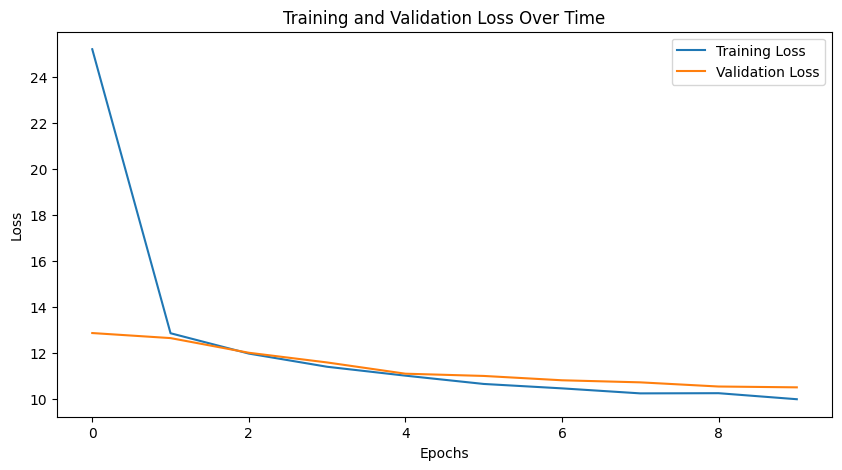

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Time')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

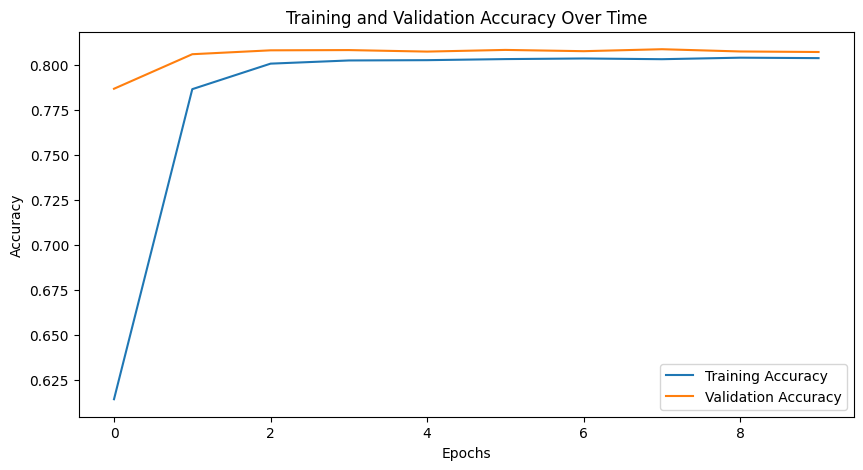

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['emotion_output_binary_accuracy'], label='Training Accuracy')
plt.plot(history.history['val_emotion_output_binary_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Time')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

VGG19

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout, BatchNormalization

def create_vgg_backbone(input_shape):
    vgg_base = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)
    return vgg_base

def face_detection_head(backbone_output):
    x = Conv2D(64, (3, 3), activation='relu')(backbone_output)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(4, activation='linear', name='bbox_output')(x)
    return x

def emotion_classification_head(backbone_output, num_emotions):
    x = Flatten()(backbone_output)
    x = Dropout(0.6)(x)
    x = Dense(32, kernel_regularizer=l1_l2(l1=0.03, l2=0.03), activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dense(num_emotions, activation='sigmoid', name='emotion_output')(x)
    return x

# Define the input shape and number of emotion categories
input_shape = (224, 224, 3)
num_emotions = 37

# Create the VGG19 backbone
vgg_backbone = create_vgg_backbone(input_shape)

# Freeze the layers in the VGG19 backbone (optional)
for layer in vgg_backbone.layers:
    layer.trainable = False

# Create the face detection head and emotion classification head
face_detection_output = face_detection_head(vgg_backbone.output)
emotion_classification_output = emotion_classification_head(vgg_backbone.output, num_emotions)

# Define the final model with two output layers
final_model = tf.keras.Model(inputs=vgg_backbone.input, outputs=[face_detection_output, emotion_classification_output])

# Compile the model with appropriate loss functions and metrics for each task
from tensorflow.keras.metrics import MeanSquaredError, MeanAbsoluteError, BinaryAccuracy

final_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                    loss={'bbox_output': 'mean_squared_error', 'emotion_output': 'binary_crossentropy'},
                    loss_weights={'bbox_output': 1.0, 'emotion_output': 1.0},
                    metrics={'bbox_output': [MeanSquaredError(), MeanAbsoluteError()],
                             'emotion_output': BinaryAccuracy()})

# Print the model summary
final_model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 224, 224, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv2 (Conv2D)          (None, 224, 224, 64  36928       ['block1_conv1[0][0]']           
                                )                                                             

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Add early stopping callback
early_stopping_callback = EarlyStopping(patience=5, monitor='val_loss', mode='min', verbose=1)

num_samples_train = len(train_images)
num_samples_val = len(val_images)

batch_size = 64
steps_per_epoch = num_samples_train // batch_size
validation_steps = num_samples_val // batch_size

# Train the model
history = final_model.fit(
    train_data_gen,
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=val_data_gen,
    validation_steps=validation_steps,
    callbacks=[early_stopping_callback]
)


Epoch 1/10
68/68 [==============================] - 11s 62ms/step - loss: 11.3538 - bbox_output_loss: 1.8666 - emotion_output_loss: 0.4281 - bbox_output_mean_squared_error: 1.8666 - bbox_output_mean_absolute_error: 0.6963 - emotion_output_binary_accuracy: 0.8032 - val_loss: 11.4745 - val_bbox_output_loss: 2.0243 - val_emotion_output_loss: 0.4152 - val_bbox_output_mean_squared_error: 2.0243 - val_bbox_output_mean_absolute_error: 0.6820 - val_emotion_output_binary_accuracy: 0.8111
Epoch 2/10
68/68 [==============================] - 4s 61ms/step - loss: 11.3328 - bbox_output_loss: 1.8022 - emotion_output_loss: 0.4294 - bbox_output_mean_squared_error: 1.8022 - bbox_output_mean_absolute_error: 0.6585 - emotion_output_binary_accuracy: 0.8020 - val_loss: 11.4578 - val_bbox_output_loss: 1.8733 - val_emotion_output_loss: 0.4224 - val_bbox_output_mean_squared_error: 1.8733 - val_bbox_output_mean_absolute_error: 0.6572 - val_emotion_output_binary_accuracy: 0.8054
Epoch 3/10
68/68 [===============

In [ ]:
evaluation = final_model.evaluate(test_data_gen, steps=len(test_images) // 64)
print('Evaluation:', evaluation)

9/9 [==============================] - 1s 29ms/step - loss: 10.2895 - bbox_output_loss: 0.8824 - emotion_output_loss: 0.4283 - bbox_output_mean_squared_error: 0.8824 - bbox_output_mean_absolute_error: 0.6238 - emotion_output_binary_accuracy: 0.8058
Evaluation: [10.289536476135254, 0.8824070692062378, 0.4282567799091339, 0.8824070692062378, 0.6237854361534119, 0.805837094783783]


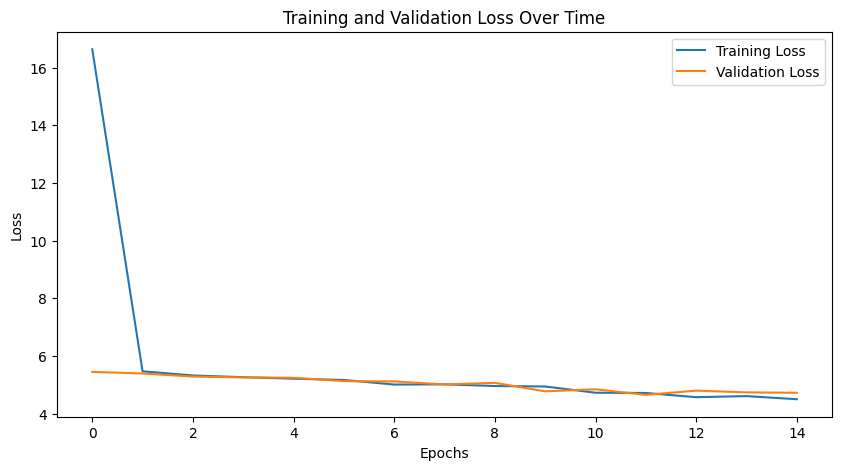

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Time')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

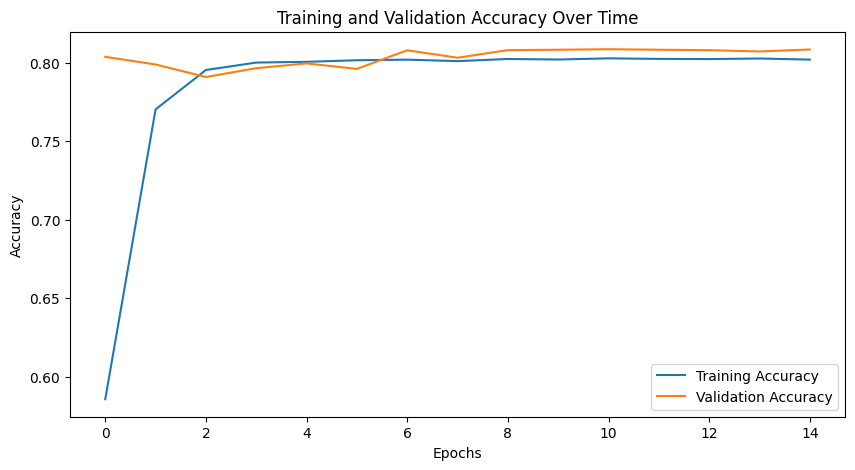

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['emotion_output_binary_accuracy'], label='Training Accuracy')
plt.plot(history.history['val_emotion_output_binary_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Time')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Fine Tune Model

In [16]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import MeanSquaredError, MeanAbsoluteError, BinaryAccuracy
from tensorflow.keras import initializers


def create_vgg_backbone(input_shape):
    vgg_base = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)
    return vgg_base

def face_detection_head(backbone_output):
    x = Conv2D(64, (3, 3), activation='relu')(backbone_output)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(4, activation='linear', name='bbox_output')(x)
    return x

def emotion_classification_head(backbone_output, num_emotions):
    x = Flatten()(backbone_output)
    x = Dropout(0.6)(x)
    x = Dense(84, kernel_regularizer=l1_l2(l1=0.02, l2=0.02),
              activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dense(num_emotions,
              activation='sigmoid',
              name='emotion_output')(x)
    return x

# Define the input shape and number of emotion categories
input_shape = (224, 224, 3)
num_emotions = 37

# Create the VGG19 backbone
vgg_backbone = create_vgg_backbone(input_shape)

# unfreeze the last 4 layers
num_layers_to_freeze = len(vgg_backbone.layers) - 4

for layer in vgg_backbone.layers[:num_layers_to_freeze]:
    layer.trainable = False
for layer in vgg_backbone.layers[num_layers_to_freeze:]:
    layer.trainable = True


# Create the face detection head and emotion classification head
face_detection_output = face_detection_head(vgg_backbone.output)
emotion_classification_output = emotion_classification_head(vgg_backbone.output, num_emotions)

# Define the final model with two output layers
final_model = tf.keras.Model(inputs=vgg_backbone.input, outputs=[face_detection_output, emotion_classification_output])

# Compile the model with appropriate loss functions and metrics for each task
final_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.002),
                    loss={'bbox_output': 'mean_squared_error', 'emotion_output': 'binary_crossentropy'},
                    loss_weights={'bbox_output': 1.0, 'emotion_output': 1.0},
                    metrics={'bbox_output': [MeanSquaredError(), MeanAbsoluteError()],
                             'emotion_output': BinaryAccuracy()})

# Print the model summary
final_model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 224, 224, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv2 (Conv2D)          (None, 224, 224, 64  36928       ['block1_conv1[0][0]']           
                                )                                                             

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

# Add early stopping callback
early_stopping_callback = EarlyStopping(patience=5, monitor='val_loss', mode='min', verbose=1)

num_samples_train = len(train_images)
num_samples_val = len(val_images)

batch_size = 64
steps_per_epoch = num_samples_train // batch_size
validation_steps = num_samples_val // batch_size

# Train the model
history = final_model.fit(
    train_data_gen,
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=val_data_gen,
    validation_steps=validation_steps,
    callbacks=[early_stopping_callback]
)

Epoch 1/10
68/68 [==============================] - 41s 183ms/step - loss: 46.4328 - bbox_output_loss: 6.4817 - emotion_output_loss: 0.6825 - bbox_output_mean_squared_error: 6.4817 - bbox_output_mean_absolute_error: 1.2257 - emotion_output_binary_accuracy: 0.6138 - val_loss: 13.6847 - val_bbox_output_loss: 1.8023 - val_emotion_output_loss: 0.5484 - val_bbox_output_mean_squared_error: 1.8023 - val_bbox_output_mean_absolute_error: 0.6564 - val_emotion_output_binary_accuracy: 0.7573
Epoch 2/10
68/68 [==============================] - 4s 58ms/step - loss: 13.6355 - bbox_output_loss: 1.9319 - emotion_output_loss: 0.4765 - bbox_output_mean_squared_error: 1.9319 - bbox_output_mean_absolute_error: 0.7164 - emotion_output_binary_accuracy: 0.7852 - val_loss: 12.8577 - val_bbox_output_loss: 1.7361 - val_emotion_output_loss: 0.4275 - val_bbox_output_mean_squared_error: 1.7361 - val_bbox_output_mean_absolute_error: 0.6244 - val_emotion_output_binary_accuracy: 0.8067
Epoch 3/10
68/68 [==============

In [18]:
evaluation = final_model.evaluate(test_data_gen, steps=len(test_images) // 32)
print('Evaluation:', evaluation)

19/19 [==============================] - 2s 58ms/step - loss: 13.0862 - bbox_output_loss: 1.7554 - emotion_output_loss: 0.4265 - bbox_output_mean_squared_error: 1.7554 - bbox_output_mean_absolute_error: 0.6707 - emotion_output_binary_accuracy: 0.8068
Evaluation: [13.086237907409668, 1.755442500114441, 0.426461398601532, 1.755442500114441, 0.6706867218017578, 0.8067681193351746]


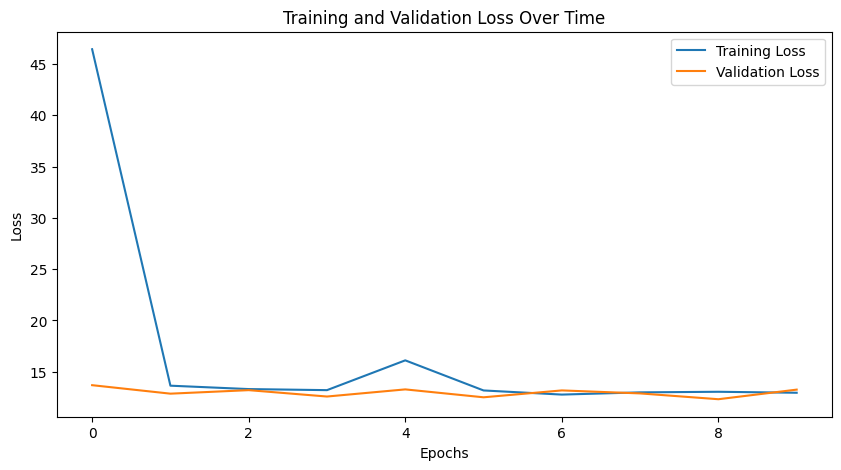

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Time')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

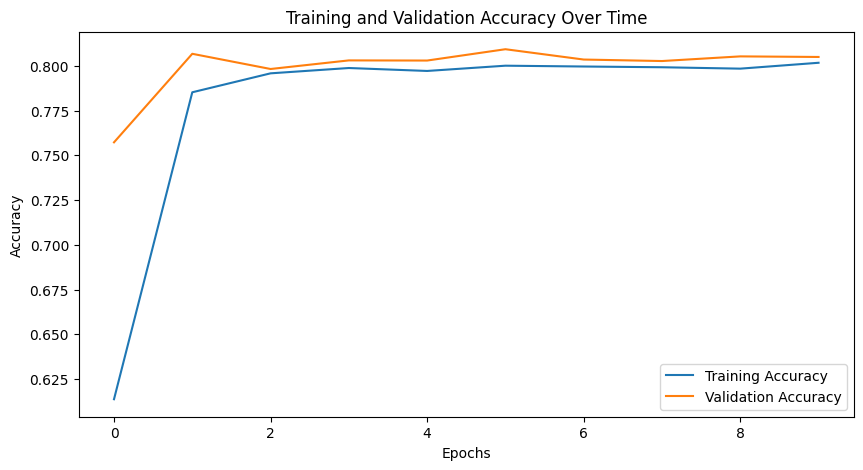

In [20]:
plt.figure(figsize=(10,5))
plt.plot(history.history['emotion_output_binary_accuracy'], label='Training Accuracy')
plt.plot(history.history['val_emotion_output_binary_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Time')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [21]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import save_model

save_model(final_model, 'p/content/drive/MyDrive/Emotic_Dataset/model_vgg19.h5')

## Prediction

In [22]:
import matplotlib.pyplot as plt
import cv2
import matplotlib.patches as patches

def plot_predictions(images, bbox_predictions, emotion_predictions, binarizer):
    fig, axs = plt.subplots(1, len(images), figsize=(20, 20))

    for i, ax in enumerate(axs):
        img = images[i]

        # Convert float images to uint8 (0-255)
        img = (img * 255).astype(np.uint8)

        # Convert BGR to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Get the bounding box coordinates from bbox_predictions
        bbox = bbox_predictions[i]

        # Add bounding box
        rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2] - bbox[0], bbox[3] - bbox[1], linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

        # Invert the binary encoding to get emotion labels
        emotion = binarizer.inverse_transform(np.array([emotion_predictions[i]]))[0]

        # Convert to string and add emotion prediction as text below the image
        ax.imshow(img)
        ax.axis('off')
        ax.text(bbox[0], bbox[3] + 20, str(emotion), color='red', fontsize=12, weight='bold')

    plt.show()

In [23]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from sklearn.preprocessing import MultiLabelBinarizer

class FaceTracker(Model):
    def __init__(self, eyetracker,  **kwargs):
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt

    def train_step(self, batch, **kwargs):
        X, y = batch

        with tf.GradientTape() as tape:
            classes, coords = self.model(X, training=True)

            batch_classloss = self.closs(y['emotion_output'], classes)

            batch_localizationloss = self.lloss(tf.cast(y['bbox_output'], tf.float32), coords)

            total_loss = batch_localizationloss + 0.5 * batch_classloss

            grad = tape.gradient(total_loss, self.model.trainable_variables)

        self.opt.apply_gradients(zip(grad, self.model.trainable_variables))

        return {"total_loss": total_loss, "class_loss": batch_classloss, "regress_loss": batch_localizationloss}


    def test_step(self, batch, **kwargs):
        X, y = batch

        classes, coords = self.model(X, training=False)

        batch_classloss = self.closs(y['emotion_output'], classes)

        batch_localizationloss = self.lloss(tf.cast(y['bbox_output'], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss

        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}

    def call(self, X, **kwargs):
        return self.model(X, **kwargs)


In [24]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [25]:

def localization_loss(y_true, yhat):
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))

    h_true = y_true[:,3] - y_true[:,1]
    w_true = y_true[:,2] - y_true[:,0]

    h_pred = yhat[:,3] - yhat[:,1]
    w_pred = yhat[:,2] - yhat[:,0]

    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))

    return delta_coord + delta_size

In [26]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [27]:
model = FaceTracker(final_model)
model.compile(opt=opt, classloss=classloss, localizationloss=regressloss)

In [30]:
# Training the model
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = final_model.fit(
    train_data_gen,
    epochs=5,
    steps_per_epoch=64,
    validation_data=val_data_gen,
    validation_steps=64,
    callbacks=[tensorboard_callback]
)


Epoch 1/5
64/64 [==============================] - 12s 87ms/step - loss: 12.8918 - bbox_output_loss: 1.6931 - emotion_output_loss: 0.4359 - bbox_output_mean_squared_error: 1.6931 - bbox_output_mean_absolute_error: 0.6520 - emotion_output_binary_accuracy: 0.8025 - val_loss: 13.0141 - val_bbox_output_loss: 1.6538 - val_emotion_output_loss: 0.4270 - val_bbox_output_mean_squared_error: 1.6538 - val_bbox_output_mean_absolute_error: 0.6305 - val_emotion_output_binary_accuracy: 0.8073
Epoch 2/5
64/64 [==============================] - 6s 92ms/step - loss: 12.8593 - bbox_output_loss: 1.6641 - emotion_output_loss: 0.4335 - bbox_output_mean_squared_error: 1.6641 - bbox_output_mean_absolute_error: 0.6694 - emotion_output_binary_accuracy: 0.7996 - val_loss: 12.4255 - val_bbox_output_loss: 1.5591 - val_emotion_output_loss: 0.4304 - val_bbox_output_mean_squared_error: 1.5591 - val_bbox_output_mean_absolute_error: 0.6346 - val_emotion_output_binary_accuracy: 0.8061
Epoch 3/5
64/64 [==================

In [64]:
evaluation = final_model.evaluate(test_data_gen, steps=len(test_images) // 32)
print('Evaluation:', evaluation)

19/19 [==============================] - 1s 28ms/step - loss: 13.1584 - bbox_output_loss: 1.7158 - emotion_output_loss: 0.4209 - bbox_output_mean_squared_error: 1.7158 - bbox_output_mean_absolute_error: 0.6215 - emotion_output_binary_accuracy: 0.8088
Evaluation: [13.158357620239258, 1.715783953666687, 0.42086949944496155, 1.715783953666687, 0.6214961409568787, 0.8088122010231018]


In [59]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from PIL import Image
import os

def load_and_preprocess_image(image_path, grayscale=False):
    if os.path.isfile(image_path):
        image = Image.open(image_path)

        if image.mode != 'RGB':
            image = image.convert('RGB')

        image = image.resize((224, 224))
        image = np.array(image) / 255.0

        # Ensuring the image is 3-dimensional (height, width, channels)
        if image.ndim == 2:  # Grayscale image
            image = np.stack((image,)*3, axis=-1)

        return np.expand_dims(image, axis=0)  # Adding an extra dimension for batch size
    else:
        print(f"Image file {image_path} does not exist.")
        return None

# Define the emotion classes
emotion_classes = ['Affection', 'Anger', 'Annoyance', 'Anticipation', 'Aversion', 'Confidence', 'Disapproval', 'Disconnection',
                   'Disquietment', 'Doubt/Confusion', 'Embarrassment', 'Engagement', 'Esteem', 'Excitement', 'Fatigue', 'Fear',
                   'Happiness', 'Pain', 'Peace', 'Pleasure', 'Sadness', 'Sensitivity', 'Suffering', 'Surprise', 'Sympathy', 'Yearning']

# Function to plot the image and predicted bounding boxes
def plot_predictions(image, bbox_predictions, emotion_predictions):
    print(f'Bounding box predictions: {bbox_predictions}')
    print(f'Emotion predictions: {emotion_predictions}')

    fig, ax = plt.subplots(figsize=(8, 8))

    ax.imshow(image)
    ax.axis('off')

    # Extract the first element from the nested lists
    bbox_prediction = bbox_predictions[0]
    emotion_prediction = emotion_predictions[0]

    # Make sure bbox_prediction and emotion_prediction are 1D arrays
    if len(bbox_prediction.shape) > 1:
        bbox_prediction = bbox_prediction[0]

    emotion_prediction = emotion_prediction.flatten()

    if np.any(bbox_prediction) and len(bbox_prediction) >= 4:
        # Convert the normalized bounding box back to original image dimensions
        height, width = image.shape[0], image.shape[1]
        x_min = int(bbox_prediction[0] * width)
        y_min = int(bbox_prediction[1] * height)
        x_max = int(bbox_prediction[2] * width)
        y_max = int(bbox_prediction[3] * height)

        rect = patches.Rectangle((x_min, y_min),
                                 x_max - x_min,
                                 y_max - y_min,
                                 linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

        # Display emotion labels and their corresponding scores
        emotions = [emotion_classes[i] for i, score in enumerate(emotion_prediction) if score >= 0.5 and i < len(emotion_classes)]
        scores = [score for i, score in enumerate(emotion_prediction) if score >= 0.5 and i < len(emotion_classes)]

        for j in range(len(emotions)):
            ax.text(x_min, y_min - 10 - (j * 15), f'{emotions[j]}: {scores[j]:.2f}', fontsize=12, color='red')

    else:
        print('Bounding box prediction has fewer than 4 elements.')

    plt.show()




In [127]:
test_image_path = '/content/angry-boy.jpg'
test_image = load_and_preprocess_image(test_image_path)


In [128]:
# Assuming 'model' is your trained FaceTracker model
predictions = model.predict(test_image)


# Print the predictions for the single test image
print(predictions)


# For a single test image, access its predictions directly (no indexing required)
predictions_single_image = predictions

# Extract the bounding box predictions and emotion predictions
bbox_predictions = predictions_single_image[0]
emotion_predictions = predictions_single_image[1]





1/1 [==============================] - 0s 25ms/step
[array([[0.85279506, 0.34177524, 1.662596  , 1.6634601 ]], dtype=float32), array([[0.672741  , 0.999747  , 0.7397844 , 0.04992301, 0.42499864,
        0.2595766 , 0.13752545, 0.68817836, 0.03326335, 0.37027258,
        0.29276025, 0.14273144, 0.04741738, 0.9998147 , 0.99972814,
        0.9266214 , 0.06131639, 0.71753186, 0.25884905, 0.9416013 ,
        0.34262404, 0.6020164 , 0.04648299, 0.8373293 , 0.22232993,
        0.72538894, 0.9601419 , 0.5668377 , 0.63363945, 0.03833113,
        0.2823098 , 0.5921232 , 0.8495674 , 0.2870518 , 0.06310198,
        0.34049302, 0.09023816]], dtype=float32)]


Bounding box predictions: [[0.85279506 0.34177524 1.662596   1.6634601 ]]
Emotion predictions: [[0.672741   0.999747   0.7397844  0.04992301 0.42499864 0.2595766
  0.13752545 0.68817836 0.03326335 0.37027258 0.29276025 0.14273144
  0.04741738 0.9998147  0.99972814 0.9266214  0.06131639 0.71753186
  0.25884905 0.9416013  0.34262404 0.6020164  0.04648299 0.8373293
  0.22232993 0.72538894 0.9601419  0.5668377  0.63363945 0.03833113
  0.2823098  0.5921232  0.8495674  0.2870518  0.06310198 0.34049302
  0.09023816]]


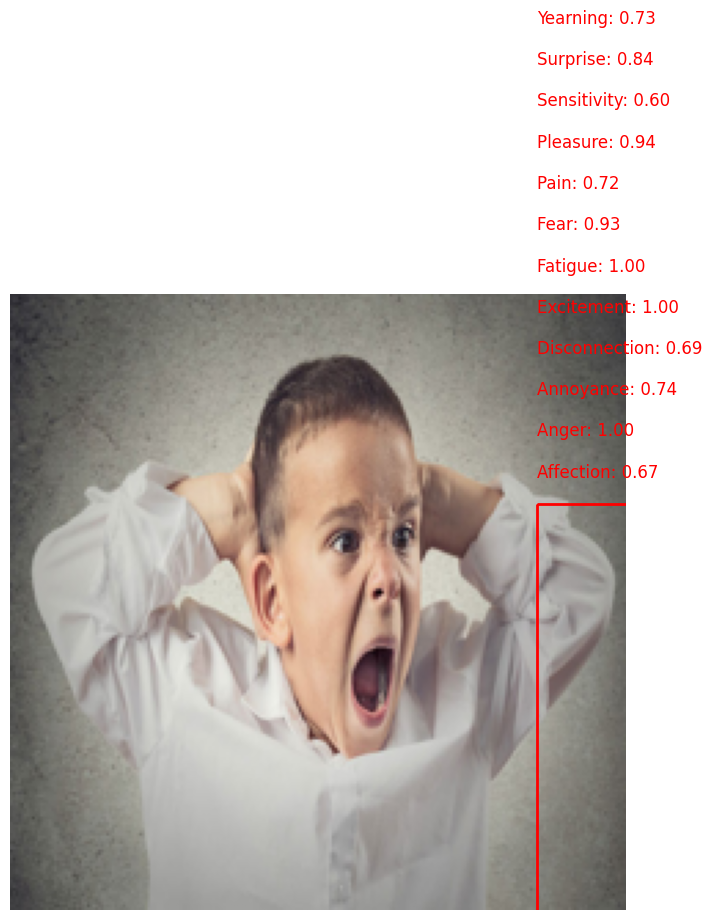

In [129]:
plot_predictions(test_image[0], bbox_predictions, emotion_predictions)
